In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in csv data
attrition_df = pd.read_csv("data/IBM_attrition_data.csv")
data = attrition_df.copy()
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data["BusinessTravel"].unique

<bound method Series.unique of 0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object>

# LABELS CHECKER

data_temp = attrition_df.values
X_temp = data_temp[:, 0] + data_temp[:, 2:34]
y_temp = data_temp[:, 1]

from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_temp)
encoded_y = label_encoder.transform(y_temp)

type(X_temp)

encoded_y

# END LABELS CHECKER

In [4]:
len(data)

1470

In [5]:
# Drop unnecessary columns
# data = data.drop(["Over18", "EmployeeCount", "StandardHours", "EmployeeNumber"], axis=1)
# data

data = data[["Attrition", "Age", "Education", "DistanceFromHome", "JobInvolvement", "HourlyRate", "JobRole", "Gender", "BusinessTravel"]].copy()

In [6]:
data.head()

,Attrition,Age,Education,DistanceFromHome,JobInvolvement,HourlyRate,JobRole,Gender,BusinessTravel
0,Yes,41,2,1,3,94,Sales Executive,Female,Travel_Rarely
1,No,49,1,8,2,61,Research Scientist,Male,Travel_Frequently
2,Yes,37,2,2,2,92,Laboratory Technician,Male,Travel_Rarely
3,No,33,4,3,3,56,Research Scientist,Female,Travel_Frequently
4,No,27,1,2,3,40,Laboratory Technician,Male,Travel_Rarely


In [7]:
data.dtypes

Attrition           object
Age                  int64
Education            int64
DistanceFromHome     int64
JobInvolvement       int64
HourlyRate           int64
JobRole             object
Gender              object
BusinessTravel      object
dtype: object

In [8]:
len(data)

1470

In [9]:
# Create train and test set from data
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
# Segregating target and feature variables 
data = train_set.drop("Attrition", axis=1)
data_labels = train_set["Attrition"].copy()
# data_labels = pd.get_dummies(data_labels, drop_first=True)
len(data)

1176

In [11]:
len(data_labels)

1176

In [12]:
data_labels

1097     No
727      No
254      No
1175     No
1341     No
       ... 
1130     No
1294     No
860     Yes
1459     No
1126     No
Name: Attrition, Length: 1176, dtype: object

In [13]:
# Preprocessing categorical columns 
def preprocess_cat_columns(data):
    data["Education"] = data["Education"].map({1:"Below College", 2:"College", 3:"Bachelor", 4:"Master",5:"Doctor"}) 
    # attrition_df["EnvironmentSatisfaction"] = attrition_df["EnvironmentSatisfaction"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["JobInvolvement"] = data["JobInvolvement"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    # attrition_df["JobSatisfaction"] = attrition_df["JobSatisfaction"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    # attrition_df["PerformanceRating"] = attrition_df["PerformanceRating"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    # attrition_df["RelationshipSatisfaction"] = attrition_df["RelationshipSatisfaction"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    # attrition_df["WorkLifeBalance"] = attrition_df["WorkLifeBalance"].map({1:"Bad", 2:"Good", 3:"Better", 4:"Best"})
    return data


In [14]:
from sklearn.pipeline import make_pipeline

In [15]:
# Number pipeline transformer 
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

# Complete transformation for categorical and numeric data
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Education", "JobInvolvement", "BusinessTravel", "Gender", "Job Role"]
    # cat_attrs = ["BusinessTravel", "Department", "Education", 
    #                 "EducationField", "EnvironmentSatisfaction", "Gender",
    #                 "JobInvolvement", "JobRole", "JobSatisfaction", 
    #                 "MaritalStatus", "OverTime", "PerformanceRating", 
    #                 "RelationshipSatisfaction", "WorkLifeBalance"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)

    # Make full_pipeline accessible outside the function
    global full_pipeline
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    # pipe = make_pipeline(full_pipeline, logreg)

    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [16]:
##from raw data to processed data in 2 steps
preprocessed_df = preprocess_cat_columns(data)
preprocessed_df

,Age,Education,DistanceFromHome,JobInvolvement,HourlyRate,JobRole,Gender,BusinessTravel
1097,24,College,21,Medium,57,Laboratory Technician,Male,Travel_Rarely
727,18,College,5,High,73,Research Scientist,Male,Non-Travel
254,29,College,20,High,45,Sales Executive,Male,Travel_Rarely
1175,39,Bachelor,12,High,66,Manufacturing Director,Male,Travel_Rarely
1341,31,Bachelor,20,High,89,Laboratory Technician,Male,Travel_Rarely
...,...,...,...,...,...,...,...,...
1130,35,Bachelor,28,Very High,46,Laboratory Technician,Male,Travel_Rarely
1294,41,Bachelor,5,Very High,85,Healthcare Representative,Male,Travel_Rarely
860,22,Master,3,Medium,48,Research Scientist,Male,Travel_Frequently
1459,29,College,13,Medium,46,Laboratory Technician,Male,Travel_Rarely


In [17]:
preprocessed_df.dtypes

Age                  int64
Education           object
DistanceFromHome     int64
JobInvolvement      object
HourlyRate           int64
JobRole             object
Gender              object
BusinessTravel      object
dtype: object

In [18]:
prepared_data = pipeline_transformer(data)
prepared_data

array([[-1.38855944,  1.44039645, -0.47283217, ...,  0.        ,
         0.        ,  1.        ],
       [-2.04073779, -0.52269928,  0.30937375, ...,  1.        ,
         0.        ,  0.        ],
       [-0.84507748,  1.31770296, -1.05948661, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.60595222, -0.76808624, -0.912823  , ...,  0.        ,
         1.        ,  0.        ],
       [-0.84507748,  0.45884859, -1.01059874, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.43754676, -0.03192534, -0.37505643, ...,  0.        ,
         0.        ,  1.        ]])

In [19]:
prepared_data.shape

(1176, 15)

In [20]:
# prepared_data = pipeline_transformer(data)
print(prepared_data[0])

[-1.38855944  1.44039645 -0.47283217  0.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          0.          1.        ]


In [21]:
prepared_data.shape

(1176, 15)

# END PREPROCC

In [22]:
## Selecting and Training Models 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(prepared_data, data_labels)

LogisticRegression()

In [23]:
print(f"Logisitc Regression Training Data Score: {log_reg.score(prepared_data, data_labels)}")

Logisitc Regression Training Data Score: 0.8324829931972789


In [24]:
## Selecting and Training Models 
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(prepared_data, data_labels)

DecisionTreeClassifier()

In [25]:
print(f"Decision Tree Training Data Score: {decision_tree.score(prepared_data, data_labels)}")

Decision Tree Training Data Score: 1.0


In [26]:
# Predicitons using Decision Tree 

attrition_predict = decision_tree.predict(prepared_data)
print(f"First 10 Predictions: {attrition_predict[:25]}")

First 10 Predictions: ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [27]:
# Random Forest Model 
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(prepared_data, data_labels)

RandomForestClassifier()

In [28]:
print(f"Random Forest Training Data Score: {forest_clf.score(prepared_data, data_labels)}")

Random Forest Training Data Score: 1.0


In [29]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(prepared_data, data_labels)

SVC(kernel='linear')

In [30]:
print(f"SVC Training Data Score: {forest_clf.score(prepared_data, data_labels)}")

SVC Training Data Score: 1.0


In [31]:
# Hyperparameter Tuning w/ GridSearchCV
from sklearn.model_selection import GridSearchCV

forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [32]:
# Grid search with forest_clf model
param_grid = [{'n_estimators': [15, 25, 50, 75, 100], 'max_features': [1, 5, 10, 15]},
             {'bootstrap': [True], 'n_estimators': [15, 25, 50, 75, 100],'max_features': [1, 5, 10, 15] }]
grid_search = GridSearchCV(forest_clf, param_grid=param_grid, cv=5, verbose=0)

In [33]:
grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [1, 5, 10, 15],
                          'n_estimators': [15, 25, 50, 75, 100]},
                         {'bootstrap': [True], 'max_features': [1, 5, 10, 15],
                          'n_estimators': [15, 25, 50, 75, 100]}])

In [34]:
grid_search.best_estimator_

RandomForestClassifier(max_features=5)

In [35]:
# Best Params
print(grid_search.best_params_)

{'bootstrap': True, 'max_features': 5, 'n_estimators': 100}


In [36]:
cv_scores = grid_search.cv_results_

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(mean_score), params)

0.8878410951931318 {'max_features': 1, 'n_estimators': 15}
0.8949934876578006 {'max_features': 1, 'n_estimators': 25}
0.9002123402191677 {'max_features': 1, 'n_estimators': 50}
0.900210337243581 {'max_features': 1, 'n_estimators': 75}
0.8997395143335005 {'max_features': 1, 'n_estimators': 100}
0.8987951224813013 {'max_features': 5, 'n_estimators': 15}
0.9025587699497061 {'max_features': 5, 'n_estimators': 25}
0.9006869198091678 {'max_features': 5, 'n_estimators': 50}
0.9035151931713054 {'max_features': 5, 'n_estimators': 75}
0.9044526629656294 {'max_features': 5, 'n_estimators': 100}
0.8978417042711913 {'max_features': 10, 'n_estimators': 15}
0.8949955023085547 {'max_features': 10, 'n_estimators': 25}
0.9006889217249178 {'max_features': 10, 'n_estimators': 50}
0.9011572477334047 {'max_features': 10, 'n_estimators': 75}
0.9044506693805638 {'max_features': 10, 'n_estimators': 100}
0.9006829159643194 {'max_features': 15, 'n_estimators': 15}
0.9011472433121582 {'max_features': 15, 'n_estim

In [37]:
# Checking feature importance 
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.27449615, 0.20870934, 0.2773905 , 0.031209  , 0.02070224,
       0.02316813, 0.00567041, 0.02301022, 0.02407241, 0.02153462,
       0.0221575 , 0.01289957, 0.01177938, 0.0262767 , 0.01692384])

In [38]:
objects = ['object', 'int64']
# nume = ['int64']
names = list(data.select_dtypes(include=objects))

attrs = names
feature_top = sorted(zip(attrs, feature_importances), reverse=False)
feature_top_df = pd.DataFrame(data=feature_top)
feature_top_sorted = feature_top_df.sort_values(by=1, ascending=False)
feature_top_sorted

,0,1
2,DistanceFromHome,0.277390
0,Age,0.274496
3,Education,0.208709
6,JobInvolvement,0.031209
7,JobRole,0.023168
1,BusinessTravel,0.023010
5,HourlyRate,0.020702
4,Gender,0.005670


In [39]:
# Evaluating entire system on Test Data
final_model = grid_search.best_estimator_

X_test = test_set.drop("Attrition", axis=1)
y_test = test_set["Attrition"].copy()

X_test_preprocessed = preprocess_cat_columns(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

print('Test Acc: %.3f' % grid_search.score(X_test_prepared, y_test))

Test Acc: 0.864


In [40]:
X_test_preprocessed

,Age,Education,DistanceFromHome,JobInvolvement,HourlyRate,JobRole,Gender,BusinessTravel
1041,28,Bachelor,5,High,84,Sales Executive,Male,Travel_Rarely
184,53,College,13,Very High,57,Manufacturing Director,Female,Travel_Rarely
1222,24,Below College,22,Low,58,Human Resources,Male,Travel_Rarely
67,45,Bachelor,7,High,59,Research Scientist,Male,Travel_Rarely
220,36,College,5,High,62,Laboratory Technician,Male,Travel_Rarely
...,...,...,...,...,...,...,...,...
567,34,Bachelor,2,High,60,Sales Executive,Male,Travel_Rarely
560,34,Doctor,8,High,32,Manufacturing Director,Female,Travel_Rarely
945,50,Bachelor,28,High,43,Research Director,Female,Travel_Rarely
522,37,College,10,Very High,80,Research Scientist,Male,Travel_Rarely


In [41]:
X_test_prepared

array([[-1.07803559, -0.49576946,  1.09027363, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.75281886,  0.51554864, -0.29623583, ...,  0.        ,
         0.        ,  1.        ],
       [-1.53097231,  1.6532815 , -0.24488363, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.41311633,  2.41177007, -1.01516666, ...,  0.        ,
         0.        ,  1.        ],
       [-0.05892799,  0.13630435,  0.88486482, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.07341379, -0.87501375, -1.42598428, ...,  0.        ,
         0.        ,  1.        ]])

In [42]:
X_test_prepared.shape

(294, 15)

In [43]:
# Make Predictions 
predictions = final_model.predict(X_test_prepared)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
First 10 Actual labels: ['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


In [44]:
# Predictions vs. actual df
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,No
...,...,...
289,No,No
290,No,No
291,No,No
292,No,No


In [45]:
# Function to cover the entire flow 
def predict_attrition(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config, index=[0])
    else:
        df = config

    preproc_df = preprocess_cat_columns(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    probability = model.predict_proba(prepared_df)

    return y_pred, probability

In [46]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[250   5]
 [ 35   4]]


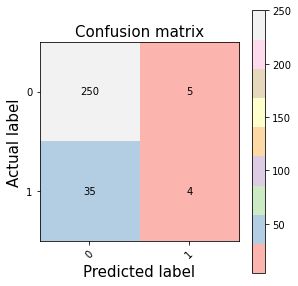

In [47]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

In [48]:
#[row, column]
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[0, 1]
fn = cm[1, 0]

In [49]:
print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))

True Positives: 250
True Negatives: 4
False Positives: 5
False Negatives: 35


In [50]:
from sklearn.metrics import classification_report
target_names = ["Yes", "No"]
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.88      0.98      0.93       255
          No       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294



In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

In [52]:
# Classification Accuracy: Overall, how often is the classifier correct?

print("Accuracy Math:" + str((tp + tn) / float(tp + tn + fp + fn)))

accuracy = accuracy_score(y_test, predictions)
print("Accuracy Sklearn: " + str(accuracy))

Accuracy Math:0.8639455782312925
Accuracy Sklearn: 0.8639455782312925


In [53]:
# Classification Sensitivity: When the actual value is positive, how often is the prediction correct?

print("Sensitivity Math:" + str(tp / float(fn + tp))) 

recall = recall_score([1 if x == "Yes" else 0 for x in y_test], 
                            [1 if x == "Yes" else 0 for x in predictions])
print("Sensitivity Sklearn: " + str(recall))

Sensitivity Math:0.8771929824561403
Sensitivity Sklearn: 0.10256410256410256


In [54]:
# Classification Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision Math:" + str(tp / float(tp + fp))) 

precision = precision_score([1 if x == "Yes" else 0 for x in y_test], 
                            [1 if x == "Yes" else 0 for x in predictions])
print("Precision Sklearn: " + str(precision))

Precision Math:0.9803921568627451
Precision Sklearn: 0.4444444444444444


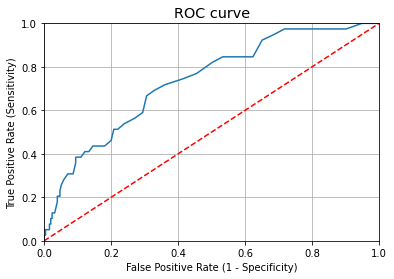

In [55]:
fpr, tpr, thresholds = roc_curve([1 if x == "Yes" else 0 for x in y_test], forest_clf.predict_proba(X_test_prepared)[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [56]:
# AUC is the percentage of the ROC plot that is underneath the curve:
# AUC is useful as a single number summary of classifier performance

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(roc_auc_score([1 if x == "Yes" else 0 for x in y_test], forest_clf.predict_proba(X_test_prepared)[:, 1]))

0.7346907993966817


In [57]:
# Saving the final model
import pickle

with open('attrition_prediction_model.bin', 'wb') as f_out: 
    pickle.dump(final_model, f_out)
    f_out.close()

In [58]:
# ##loading the model from the saved file
# with open('attrition_prediction_model.bin', 'rb') as f_in:
#     model = pickle.load(f_in)

# predict_attrition(vehicle_config, model)

In [59]:
final_model.feature_importances_

array([0.27449615, 0.20870934, 0.2773905 , 0.031209  , 0.02070224,
       0.02316813, 0.00567041, 0.02301022, 0.02407241, 0.02153462,
       0.0221575 , 0.01289957, 0.01177938, 0.0262767 , 0.01692384])

# BEGIN NEW X PREPROCC

In [131]:
data_new_X = {"Age": 34,
    "Education": "Master",
    "DistanceFromHome": 2,
    "JobInvolvement": "High",
    "HourlyRate": 70,
    "JobRole": "Sales Executive",
    "Gender": "Female",
    "BusinessTravel": "Travel_Rarely"
    }

data_new_X_df = pd.DataFrame(data_new_X, index=[0])
data_new_X_df

,Age,Education,DistanceFromHome,JobInvolvement,HourlyRate,JobRole,Gender,BusinessTravel
0,34,Master,2,High,70,Sales Executive,Female,Travel_Rarely


In [135]:
# Age                                    31
# Education                         College
# DistanceFromHome                       29
# JobInvolvement                     Medium
# HourlyRate                             71
# JobRole             Laboratory Technician
# Gender                               Male
# BusinessTravel          Travel_Frequently
# Name: 259, dtype: object


data_new_X_yes = {"Age": 28,
                "Education": "College",
                "DistanceFromHome": 29,
                "JobInvolvement": "Low",
                "HourlyRate": 70,
                "JobRole": "Laboratory Technician",
                "Gender": "Male",
                "BusinessTravel": "Travel_Frequently"
}

data_new_X_yes_df = pd.DataFrame(data_new_X_yes, index=[0])
data_new_X_yes_df

,Age,Education,DistanceFromHome,JobInvolvement,HourlyRate,JobRole,Gender,BusinessTravel
0,28,College,29,Low,70,Laboratory Technician,Male,Travel_Frequently


In [88]:
from sklearn.pipeline import make_pipeline

In [89]:
pipe = make_pipeline(full_pipeline, final_model)

In [90]:
pipe.fit(data, data_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'HourlyRate']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Education',
                                                   'JobInvolvement',
                                                   'BusinessTravel'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=5))])

In [133]:
pipe.predict(data_new_X_df)

array(['No'], dtype=object)

In [136]:
pipe.predict(data_new_X_yes_df)

array(['Yes'], dtype=object)

In [100]:
pipe.predict(X_test_preprocessed)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', '

In [102]:
X_test_preprocessed.iloc[20,:]

Age                                    31
Education                         College
DistanceFromHome                       29
JobInvolvement                     Medium
HourlyRate                             71
JobRole             Laboratory Technician
Gender                               Male
BusinessTravel          Travel_Frequently
Name: 259, dtype: object